In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [2]:
gse_true = -170.297783886436
LB = -170.7981712467869
UB = -170.25273666791773
#pollack_estimate_raw = [-170.24782475988195, -170.24764923099454, -170.2339794282666, -170.24417141559005]

In [3]:
# alphas = [ 0.01, 0.02, 0.05,  0.2, 0.5, 1.0 ]
# Tmaxs = [200, 350, 500, 750]

In [5]:
E = scipy.io.loadmat('./data/Cr2_4000.mat')['E']
H = scipy.io.loadmat('./data/H4000.mat')['H']

In [6]:
evals, evecs = scipy.linalg.eigh(H)

In [7]:
# fig, axs = plt.subplots(3, 2, figsize=(15, 10))
# xticks = np.arange(len(alphas))
# i = 0
# all_pred_evecs = []
# for Tmax in Tmaxs:
#     MAEs = []
#     residuals = []
#     angles = []
#     pred_evals = []
#     pollack_estimates = []
#     pred_evecs = []
#     for alpha in alphas:
#         data = np.load('./saved_data/Tmax='+str(Tmax)+'/cr2_gse_Pollack_estimate_penalty_residual_loss_alpha='+str(alpha)+'_Tmax='+str(Tmax)+'.npz')
#         MAEs.append(data['MAE'])
#         residuals.append(data['residual'])
#         angles.append(data['angle'])
#         pred_evals.append(data['pred_eval'])
#         pollack_estimates.append(data['pollack_estimate'])
#         pred_evecs.append(data['pred_evec'])
#     all_pred_evecs.append(pred_evecs)
#     # Semilog plot for MAEs
#     axs[0, 0].semilogy(MAEs, marker='o')
#     axs[0, 0].set_title('MAE wrt GSE')
#     axs[0, 0].set_xlabel('Alpha')
#     axs[0, 0].set_ylabel(r'$|\widetilde{\lambda_0} - \lambda_0|$')
#     axs[0, 0].set_xticks(xticks)
#     axs[0, 0].set_xticklabels(alphas)

#     # Semilog plot for residuals
#     axs[0, 1].semilogy(residuals, marker='o')
#     axs[0, 1].set_title('Residuals')
#     axs[0, 1].set_xlabel('Alpha')
#     axs[0, 1].set_ylabel(r'$||Hx - \lambda x|| / ||H||$')
#     axs[0, 1].set_xticks(xticks)
#     axs[0, 1].set_xticklabels(alphas)

#     # Semilog plot for Pollack estimates
#     axs[1, 0].semilogy(pollack_estimates, marker='o')
#     axs[1, 0].set_title('MAE wrt Pollack Estimates')
#     axs[1, 0].set_xlabel('Alpha')
#     axs[1, 0].set_ylabel(r'$|\widetilde{\lambda_0} - \lambda_{UB}|$')
#     axs[1, 0].set_xticks(xticks)
#     axs[1, 0].set_xticklabels(alphas)

#     # Scatter plot for predicted eigenvalues
#     axs[1, 1].scatter(range(len(pred_evals)), pred_evals, marker='o')
#     axs[1, 1].plot([0, len(alphas)], [gse_true, gse_true], ':k')
#     axs[1, 1].plot([0, len(alphas)], [pollack_estimate_raw[i], pollack_estimate_raw[i]], ':')
#     axs[1, 1].set_title('Predicted Eigenvalues')
#     axs[1, 1].set_xlabel('Alpha')
#     axs[1, 1].set_xticks(xticks)
#     axs[1, 1].set_xticklabels(alphas)

#     axs[1, 1].set_ylabel('eV')

#     # Regular plot for angles in degrees
#     axs[2, 0].plot(np.array(angles) * 180/np.pi, marker='o')
#     axs[2, 0].set_title('Angle wrt GS')
#     axs[2, 0].set_xlabel('Alpha')
#     axs[2, 0].set_ylabel('Degrees')
#     axs[2, 0].set_xticks(xticks)
#     axs[2, 0].set_xticklabels(alphas)
#     i += 1


# fig.delaxes(axs[2, 1])
# plt.legend(Tmaxs)
# plt.tight_layout()
# #plt.savefig('./figures/ml_results/pollack_estimate_ffnn.pdf')


In [8]:
# all_pred_evecs = np.array(all_pred_evecs).squeeze(-1)
# all_pred_evecs.shape

In [9]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# axes = axes.flatten()
# all_pred_evecs = np.array(all_pred_evecs).squeeze()
# for i in range(len(Tmaxs)):
#     axes[i].plot(evecs[:, 0],'--', label='True GS',  linewidth=3)
#     #axes[i].plot(evecs[:, 1], '--', label='1st ES',  linewidth=3)
#     for j in range(len(alphas)):
#         axes[i].plot(all_pred_evecs[i, j, :], label=rf'$\alpha = {alphas[j]}$')
#     axes[i].set_title(f'Tmax = {Tmaxs[i]}')
#     axes[i].set_xlabel('t')
   
   
#     axes[i].legend()

# plt.tight_layout()
# plt.show()

In [10]:
# all_pred_evecs.shape

In [11]:
# file_path = './logs/PE_angles_output.txt'
# with open(file_path, 'w') as file:
#     file.write('==================================================================================================================================\n')
#     for k in range(evecs.shape[1]):
#         file.write(f'Eigenindex: {k}\n')
#         for i in range(len(Tmaxs)):
#             for j in range(len(alphas)):
#                 angle = np.arccos(np.abs(np.dot(all_pred_evecs[i, j, :], evecs[:, k]))) * 180 / np.pi
#                 file.write(f"Angle for alpha = {alphas[j]}, Tmax = {Tmaxs[i]}: {angle}\n")
#         file.write('=================================================================================================================\n')

# print(f"Output written to {file_path}")

In [12]:
# import re
# Tmaxs_to_check = [200, 350, 500, 750]
# deg_check = 11
# results = {Tmax: [] for Tmax in Tmaxs_to_check}

# angle_pattern = re.compile(r'Angle for alpha = ([\d.]+), Tmax = (\d+): ([\d.]+)')


# with open(file_path, 'r') as file:
#     current_eigenindex = None
#     for line in file:
#         line = line.strip()
#         if line.startswith('Eigenindex:'):
#             current_eigenindex = int(line.split(': ')[1])
#         elif angle_pattern.search(line):
#             match = angle_pattern.search(line)
#             alpha_value = float(match.group(1))
#             Tmax_value = int(match.group(2))
#             angle_value = float(match.group(3))
#             if Tmax_value in Tmaxs_to_check and angle_value < deg_check:
#                 results[Tmax_value].append(current_eigenindex)

# for Tmax in Tmaxs_to_check:
#     print(f"Tmax = {Tmax}: Eigenindices with angle < {deg_check} degrees: {results[Tmax]}")


In [13]:
alphas = [1.0]
betas = alphas
Tmaxs = [600]
#training_MAEs=val_mae_gse , training_residuals=residuals, training_angles=angles, training_preds=val_preds, training_vec_preds=val_preds_vec
for Tmax in Tmaxs:
    MAEs = []
    residuals = []
    angles = []
    pred_evals = []
    pred_evecs = []
    vec_residuals = []
    for alpha in alphas:
        beta = alpha
        training_logs = np.load('./saved_data/Tmax='+str(Tmax)+'/cr2_gse_one_sided_penalty_residual_loss_alpha='+str(alpha)+'_beta='+str(beta)+'_Tmax='+str(Tmax)+'_training.npz')
        # test_logs = np.load('./saved_data/Tmax='+str(Tmax)+'/cr2_gse_one_sided_penalty_residual_loss_alpha='+str(alpha)+'_beta='+str(beta)+'_Tmax='+str(Tmax)+'_prediction.npz')
        MAEs.append(training_logs['training_MAEs'])
        residuals.append(training_logs['training_residuals'])
        angles.append(training_logs['training_angles'])
        pred_evals.append(training_logs['training_preds'])
        pred_evecs.append(training_logs['training_vec_preds'])
        vec_residuals.append(training_logs['training_vec_residuals'])

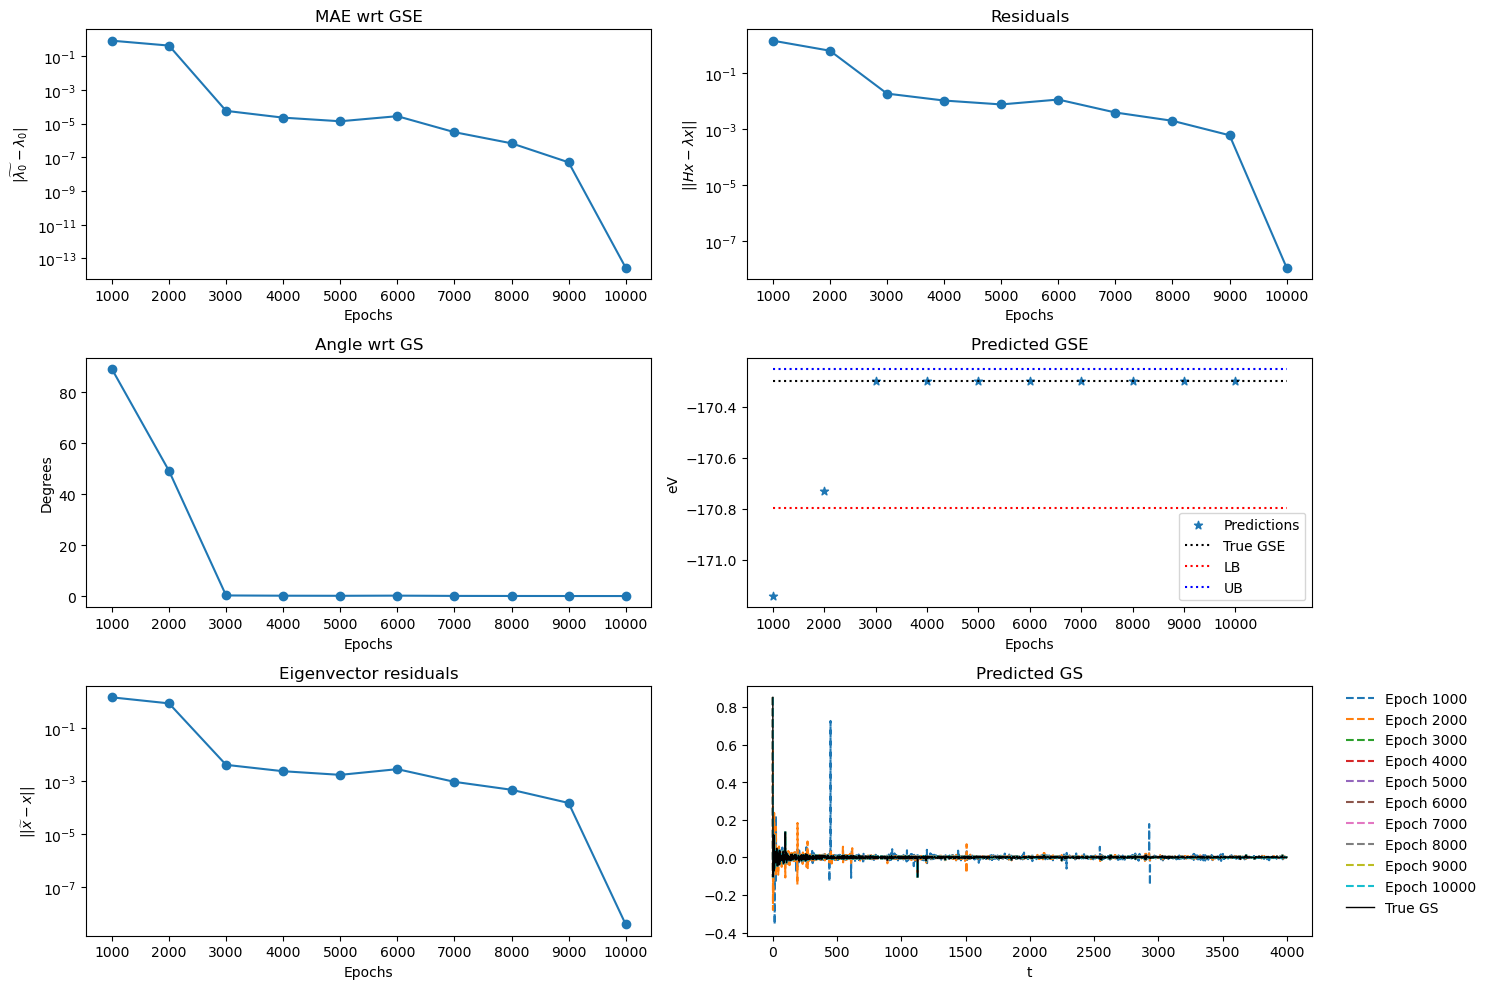

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
epochs = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
xticks = np.arange(len(epochs))

# Plot for MAEs
axs[0, 0].semilogy(MAEs[0], marker='o')
axs[0, 0].set_title('MAE wrt GSE')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel(r'$|\widetilde{\lambda_0} - \lambda_0|$')
axs[0, 0].set_xticks(xticks)
axs[0, 0].set_xticklabels(epochs)

# Semilog plot for residuals
axs[0, 1].semilogy(residuals[0], marker='o')
axs[0, 1].set_title('Residuals')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel(r'$||Hx - \lambda x||$')
axs[0, 1].set_xticks(xticks)
axs[0, 1].set_xticklabels(epochs)

# Regular plot for angles in degrees
axs[1, 0].plot(angles[0], marker='o')
axs[1, 0].set_title('Angle wrt GS')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Degrees')
axs[1, 0].set_xticks(xticks)
axs[1, 0].set_xticklabels(epochs)

# Scatter plot for predicted eigenvalues
axs[1, 1].scatter(range(len(pred_evals[0])), pred_evals[0], marker='*')
axs[1, 1].plot([0, len(epochs)], [gse_true, gse_true], ':k')
axs[1, 1].plot([0, len(epochs)], [LB, LB], ':r')
axs[1, 1].plot([0, len(epochs)], [UB, UB], ':b')
axs[1, 1].set_title('Predicted GSE')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('eV')
axs[1, 1].set_xticks(xticks)
axs[1, 1].set_xticklabels(epochs)
axs[1, 1].legend(['Predictions', 'True GSE', 'LB', 'UB'])


# Semilog plot for vector residuals
axs[2, 0].semilogy(vec_residuals[0], marker='o')
axs[2, 0].set_title('Eigenvector residuals')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel(r'$||\widetilde{x} - x||$')
axs[2, 0].set_xticks(xticks)
axs[2, 0].set_xticklabels(epochs)


# Plot for predicted eigenvectors
for i in range(len(pred_evecs[0])):
    axs[2, 1].plot(pred_evecs[0][i], '--', label=f'Epoch {epochs[i]}')
    axs[2, 1].set_xlabel('t')
axs[2, 1].plot(evecs[:, 0], color='black', linewidth=1.0, label='True GS')

axs[2, 1].set_title('Predicted GS')
axs[2, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False)

plt.tight_layout() 
plt.savefig('./figures/ml_results/cr2_training_noise=1.0_one-sided_residual_loss_alpha=beta=1.0_only_observables.pdf')

In [16]:
def compute_angle(x, y):
    cosine_similarity = np.dot(x.conj(), y)
    angle = np.arccos(cosine_similarity) * 180/np.pi
    return angle

In [17]:
anglese1000 = []
anglese2000 = []
for i in range(evecs.shape[1]):
    excited_state = evecs[:, i]
    e1000pred = pred_evecs[0][0].reshape(-1)
    e2000pred = pred_evecs[0][1].reshape(-1)
    
    angle1000 = compute_angle(excited_state, e1000pred)
    angle2000 = compute_angle(excited_state, e2000pred)
    
    anglese1000.append(angle1000)
    anglese2000.append(angle2000)

In [6]:
s_tk = np.linspace(-1, 1, 500)
N_values = [10, 50, 100]

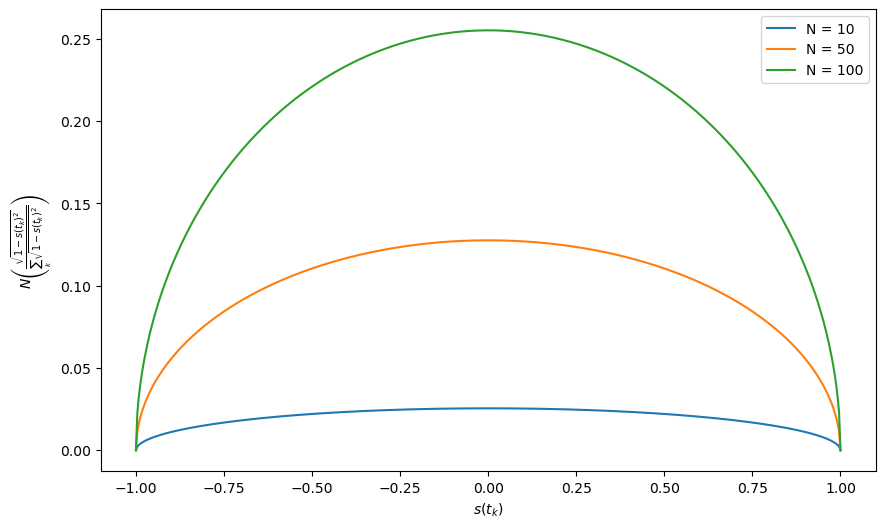

In [8]:
plt.figure(figsize=(10, 6))
for N in N_values:
    numerator = np.sqrt(1 - s_tk**2)
    denominator = np.sum(numerator)
    
    rhs = N * (numerator / denominator)
    plt.plot(s_tk, rhs, label=f'N = {N}')

# Add plot details
plt.xlabel(r'$s(t_k)$')
plt.ylabel(r'$N \left( \frac{\sqrt{1 - s(t_k)^2}}{\sum_k \sqrt{1 - s(t_k)^2}} \right)$')
plt.legend()
plt.show()